## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

###  Q.1: Import data and check null values, column info, and descriptive statistics of the data.

##### Data Exploration and Preprocessing

In [2]:
data = pd.read_csv("Instagram-Reach.csv")

In [3]:
display(data)

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


In [4]:
data.dtypes

Date               object
Instagram reach     int64
dtype: object

In [5]:
# Column Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
# Descriptive Stats
data.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


In [7]:
# Checking Missing Values

missing_values = data.isnull().sum()
print("Following are the Missing Values:")
missing_values

Following are the Missing Values:


Date               0
Instagram reach    0
dtype: int64

###  Q.2: You can convert the Date column into datetime datatype to move forward.

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data.dtypes

Date               datetime64[ns]
Instagram reach             int64
dtype: object

###  Q.3: Analyze the trend of Instagram reach over time using a line chart

In [10]:
# setting date as index

data.set_index('Date', inplace=True)

In [11]:
data

,Instagram reach
Date,
2022-04-01,7620
2022-04-02,12859
2022-04-03,16008
2022-04-04,24349
2022-04-05,20532
...,...
2023-03-27,15622
2023-03-28,18645
2023-03-29,41238


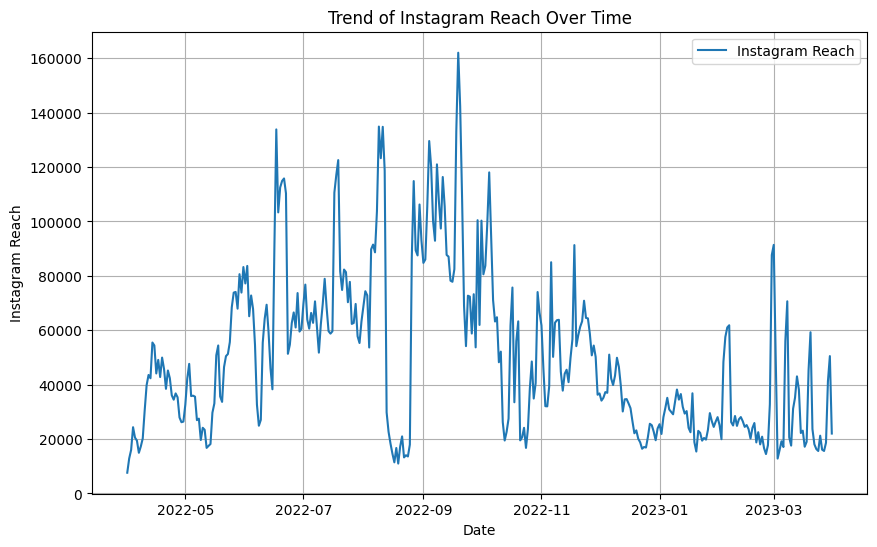

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Instagram reach'], label="Instagram Reach")
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title("Trend of Instagram Reach Over Time")
plt.legend()
plt.grid()
plt.show()

###  Q.4: Analyze Instagram reach for each day using a bar chart.

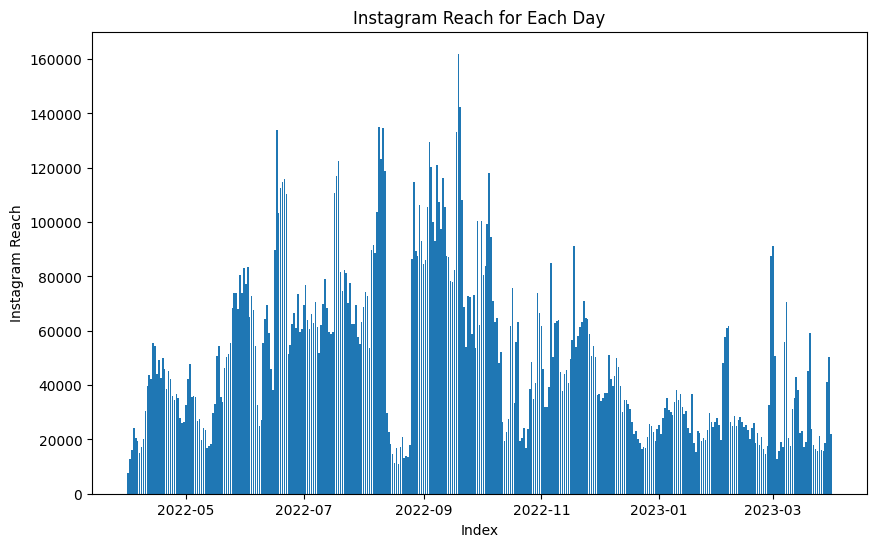

In [13]:
plt.figure(figsize=(10,6))
plt.bar(data.index, data['Instagram reach'])
plt.xlabel('Index')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach for Each Day')
plt.show()

###  Q.5: Analyze the distribution of Instagram reach using a box plot.

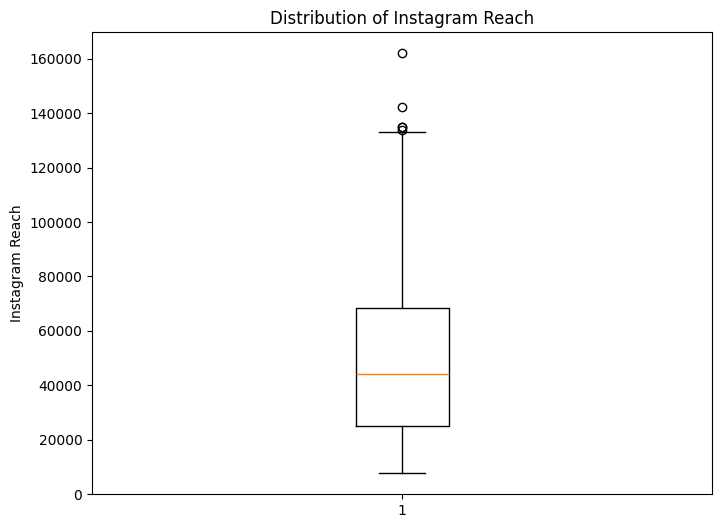

In [14]:
plt.figure(figsize=(8,6))
plt.boxplot(data['Instagram reach'])
plt.ylabel('Instagram Reach')
plt.title('Distribution of Instagram Reach')
plt.show()

###  Q.5: Now create a day column and analyze reach based on the days of the week. To create a day column, you can use the python method to extract the day of the week from the Date column.

In [15]:
data['Day'] = data.index.day_name()
data

,Instagram reach,Day
Date,,
2022-04-01,7620,Friday
2022-04-02,12859,Saturday
2022-04-03,16008,Sunday
2022-04-04,24349,Monday
2022-04-05,20532,Tuesday
...,...,...
2023-03-27,15622,Monday
2023-03-28,18645,Tuesday
2023-03-29,41238,Wednesday


### Q.6: Now analyze the reach based on the days of the week. For this, you can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day.

In [16]:
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean','median','std'])
day_stats

,mean,median,std
Day,,,
Friday,46666.849057,35574.0,29856.943036
Monday,52621.692308,46853.0,32296.071347
Saturday,47374.750000,40012.0,27667.043634
Sunday,53114.173077,47797.0,30906.162384
Thursday,48570.923077,39150.0,28623.220625
Tuesday,54030.557692,48786.0,32503.726482
Wednesday,51017.269231,42320.5,29047.869685


### Q.7: Now create a bar chart to visualize the reach for each day of the week.

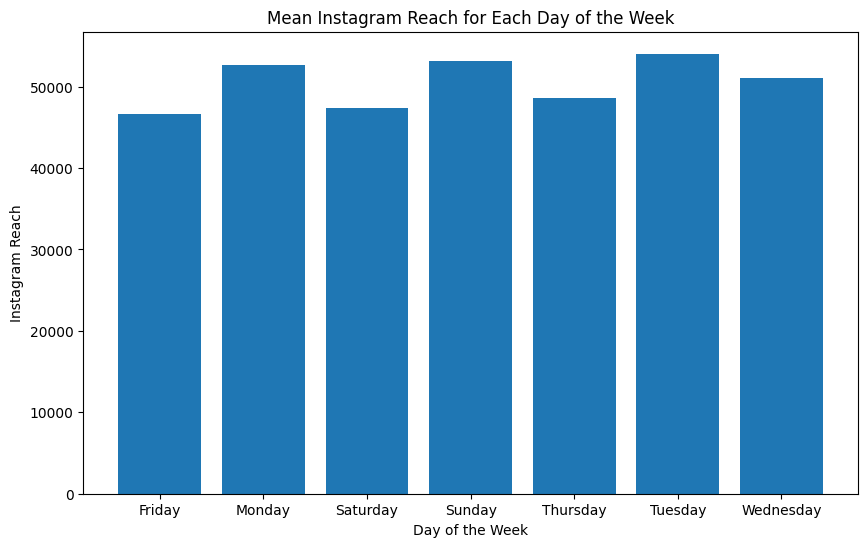

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(day_stats.index, day_stats['mean'])
plt.xlabel('Day of the Week')
plt.ylabel('Instagram Reach')
plt.title('Mean Instagram Reach for Each Day of the Week')
plt.show()

### Q.8: Check the Trends and Seasonal patterns of Instagram reach

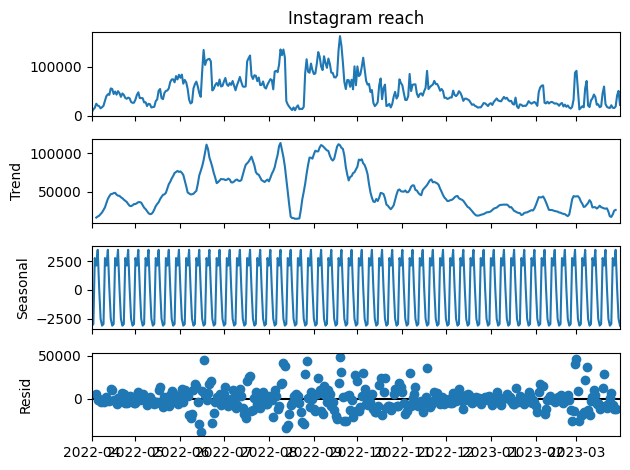

In [18]:
# Decompose the time series to check trends and seasonal patterns

decomposition = sm.tsa.seasonal_decompose(data['Instagram reach'], model='additive')
decomposition.plot()
plt.show()

### Q.9 & Q.10: Use the SARIMA model to forecast the reach

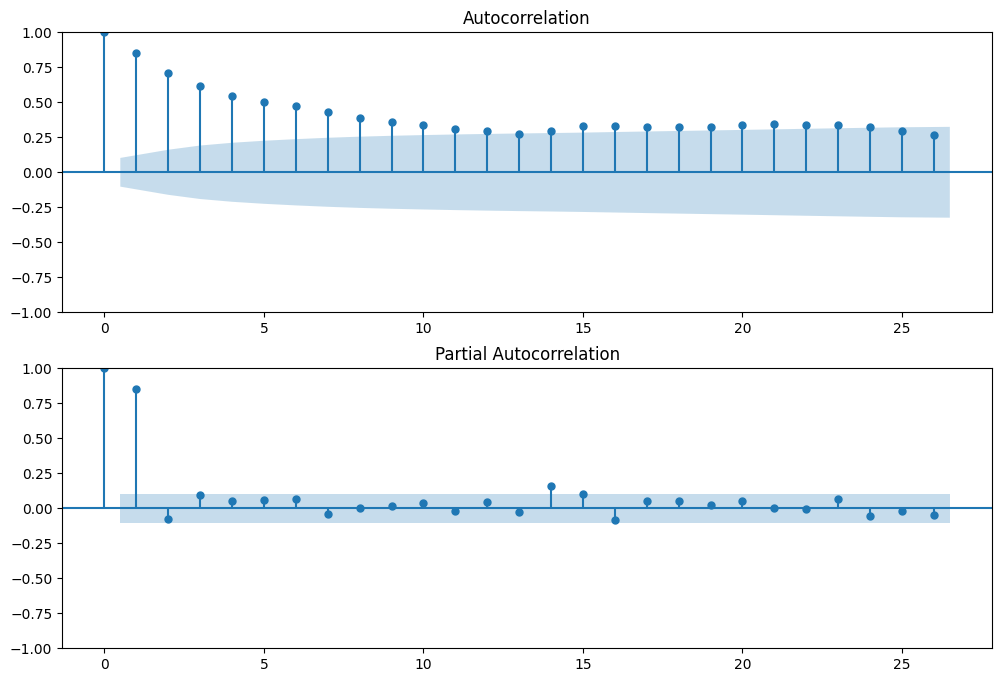

In [19]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(data['Instagram reach'], ax=ax[0])
plot_pacf(data['Instagram reach'], ax=ax[1])
plt.show()

In [23]:
p = 1
d = 1
q = 1

# To avoid Warning
data.index = pd.DatetimeIndex(data.index.values, freq=data.index.inferred_freq)
# Training the model

model = SARIMAX(data['Instagram reach'], order=(p,d,q), seasonal_order=(p,d,q,12))
model_fit = model.fit()

In [80]:
# Make Prediction

forecast = model_fit.forecast(steps=30)
print(forecast)

2023-04-01    25495.709400
2023-04-02    15587.001037
2023-04-03    17084.539849
2023-04-04    23202.162110
2023-04-05    30705.771668
2023-04-06    33421.502397
2023-04-07    26678.168526
2023-04-08    16168.573790
2023-04-09    18335.156843
2023-04-10    19017.444338
2023-04-11    21473.461280
2023-04-12    27403.419488
2023-04-13    30416.906193
2023-04-14    17820.849385
2023-04-15    18104.910985
2023-04-16    23111.823202
2023-04-17    29604.690122
2023-04-18    32167.206782
2023-04-19    25256.921173
2023-04-20    15219.006394
2023-04-21    17274.208219
2023-04-22    19323.584633
2023-04-23    22140.314260
2023-04-24    25631.892667
2023-04-25    28612.977529
2023-04-26    16150.371264
2023-04-27    16477.839775
2023-04-28    21529.667665
2023-04-29    28067.310662
2023-04-30    30621.139797
Freq: D, Name: predicted_mean, dtype: float64


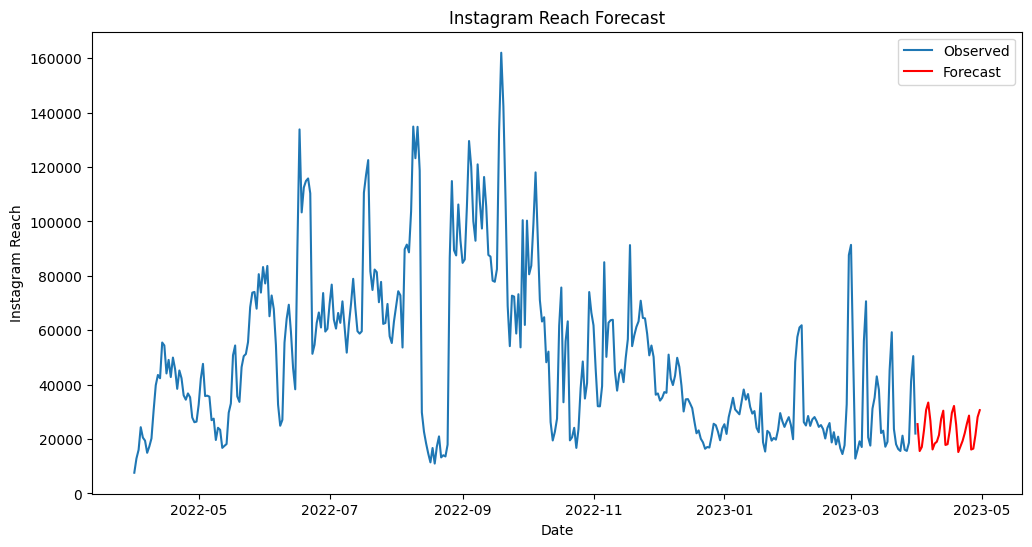

In [81]:
# Plot the Forecast

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Instagram reach'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach Forecast')
plt.show()